# Worksheet 12

Name:  
UID: 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes
2. No
3. Yes
4. No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

The way we can do is to split the dataset into training set and test set. Then, we will train the model with the training set and after we will run the test set so that this model will have a chance to perform on data it has never seen. 

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Uderfitting: Underfitting means the model is too simple and may cause more mistakes on the dateset. 

Overfitting: Overfitting means the model is too complex that there is making no error on the training dataset but might causes issue with unseen dataset. 



### K Nearest Neighbors

In [27]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

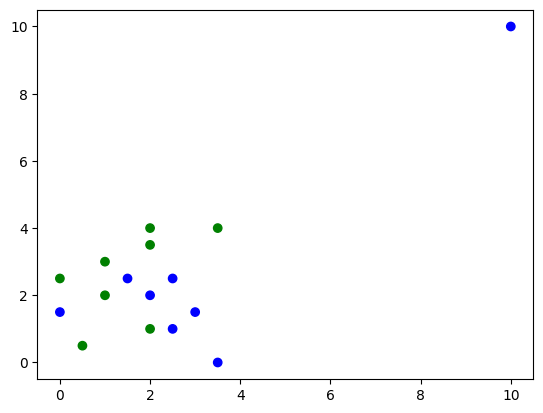

In [28]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

There is one outlier which at (10, 10). 

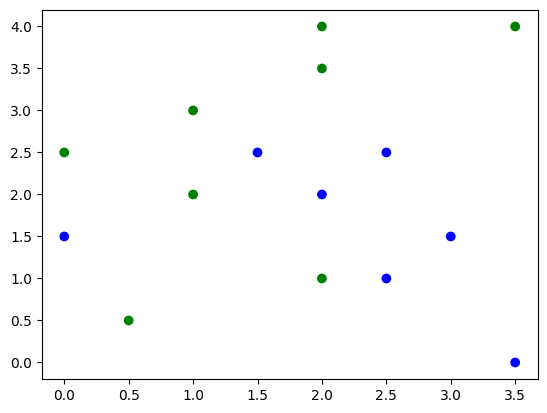

In [29]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Yes, there is one blue dot on the far left which seems like no connection with rest of blue dots. 

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

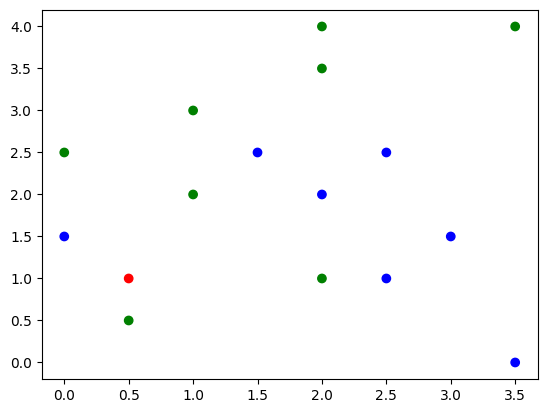

In [30]:
new_data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 0.5],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 1],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(new_data['Attribute A'], new_data['Attribute B'], color=colors[new_data["Class"]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

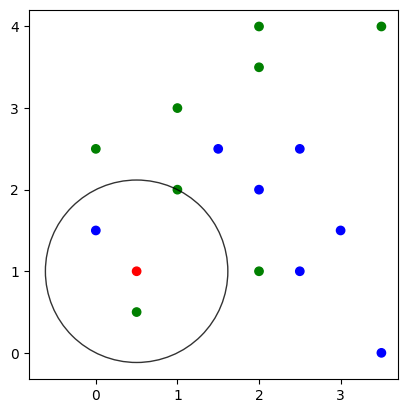

In [31]:
def n_closest_to(example, n, data):
    euclidean_D = {'class': [], 'distance': []}
    
    for i in range(len(data['Class'])): 
        euclidean_D['distance'].append(np.sqrt((np.abs(example[0] - data['Attribute A'][i]))**2 + (np.abs(example[1] - data['Attribute B'][i]))**2))
        euclidean_D['class'].append(i)

    for i in range(len(euclidean_D['class'])): 
        for j in range(i+1, len(euclidean_D['class'])): 
            if euclidean_D['distance'][i] > euclidean_D['distance'][j]: 
                temp_D = euclidean_D['distance'][i]
                temp_class = euclidean_D['class'][i]
                euclidean_D['distance'][i] = euclidean_D['distance'][j]
                euclidean_D['class'][i] = euclidean_D['class'][j]
                euclidean_D['distance'][j] = temp_D
                euclidean_D['class'][j] = temp_class

    return {'class': euclidean_D['class'][:n], 'distance': euclidean_D['distance'][:n]}

location = (0.5,1)
radius = n_closest_to(location, 3, data)['distance'][2]
_, axes = plt.subplots()
axes.scatter(new_data['Attribute A'], new_data['Attribute B'], color=colors[new_data["Class"]].tolist())
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [32]:
def majority(points):
    classes = points['class']
    A, B = 0, 0

    for i in classes: 
        if data['Class'][i] == 0: 
            A += 1
        else: 
            B += 1

    if A > B: 
        return 0
    elif A < B: 
        return 1
    elif A == B: 
        return 0
    
majority(n_closest_to(location, 3, data))

1

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [33]:
count = 0
for i in range(len(data['Class']) - 1):
    actual_class = data["Class"][i]
    training_set = {'Attribute A': data['Attribute A'][:i] + data['Attribute A'][i+1:],
                     'Attribute B': data['Attribute B'][:i] + data['Attribute B'][i+1:],
                       'Class': data['Class'][:i] + data['Class'][i+1:]}
    
    prediction = majority(n_closest_to((data['Attribute A'][i], data['Attribute B'][i]), 3, training_set))
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count / len(data['Class']))

overall accuracy =  0.5333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

Training Models: 100%|██████████| 20/20 [7:44:52<00:00, 1394.60s/it]  


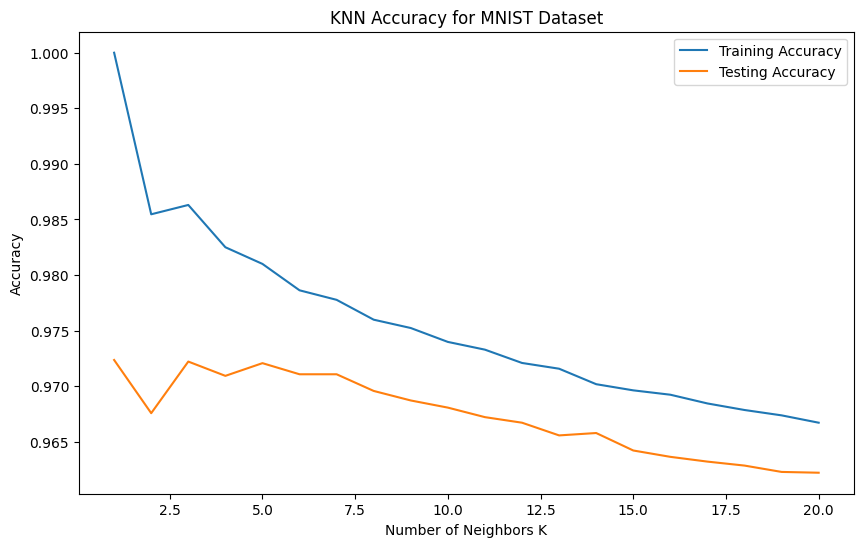

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm

# Load MNIST dataset
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Range of K to test
k_range = range(1, 21)

# Arrays to store training and testing accuracies
training_accuracies = []
testing_accuracies = []

# Wrap the loop with tqdm for a progress bar
for k in tqdm(k_range, desc="Training Models"):
    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Record the training and testing accuracies
    training_accuracy = knn.score(X_train, y_train)
    testing_accuracy = knn.score(X_test, y_test)
    
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for MNIST Dataset')
plt.legend()
plt.show()


c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

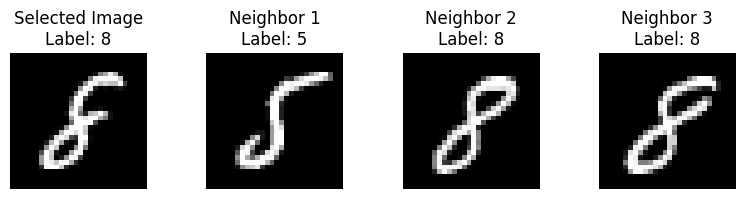

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming you've determined the best K value is 3
best_k = 3

# Train KNN with the best K value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Pick a random image from the test set
random_index = np.random.randint(0, len(X_test))
random_image = X_test[random_index]
random_image_label = y_test[random_index]

# Find K nearest neighbors
distances, indices = knn.kneighbors([random_image])

# Plot the selected image and its K nearest neighbors
plt.figure(figsize=(2*(best_k+1), 2))

# Plot the selected image
plt.subplot(1, best_k + 1, 1)
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"Selected Image\nLabel: {random_image_label}")
plt.axis('off')

# Plot each of the neighbors
for i, (dist, idx) in enumerate(zip(distances[0], indices[0]), start=2):
    neighbor_image = X_train[idx].reshape(28, 28)
    neighbor_label = y_train[idx]
    plt.subplot(1, best_k + 1, i)
    plt.imshow(neighbor_image, cmap='gray')
    plt.title(f"Neighbor {i-1}\nLabel: {neighbor_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

Training Models: 100%|██████████| 20/20 [13:50<00:00, 41.53s/it]  


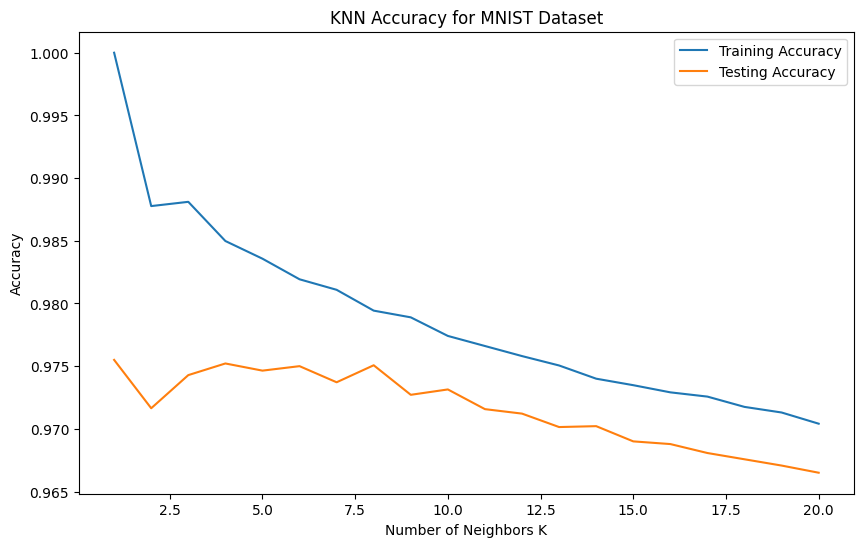

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD

# Range of K to test
k_range = range(1, 21)

# Arrays to store training and testing accuracies
training_accuracies = []
testing_accuracies = []

# Wrap the loop with tqdm for a progress bar
for k in tqdm(k_range, desc="Training Models"):
    # Train KNN Classifier
    knn = make_pipeline(TruncatedSVD(n_components=100), KNeighborsClassifier(n_neighbors=k))
    knn.fit(X_train, y_train) 
    
    # Record the training and testing accuracies
    training_accuracy = knn.score(X_train, y_train)
    testing_accuracy = knn.score(X_test, y_test)
    
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for MNIST Dataset')
plt.legend()
plt.show()

The similarity with previous one is both model has best performance with neighbors 3. The model with decomposition has better performance than the previous one. The reason I choose 100 component is depends on the previous results from the homework 10. 

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data['']

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
test = pd.get_dummies(test_data[features])
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Range of K to test
k_range = range(1, 21)

# Arrays to store training and testing accuracies
training_accuracies = []
testing_accuracies = []

# Wrap the loop with tqdm for a progress bar
for k in tqdm(k_range, desc="Training Models"):
    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Record the training and testing accuracies
    training_accuracy = knn.score(X_train, y_train)
    testing_accuracy = knn.score(X_test, y_test)
    
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Titanic Dataset')
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

prediction = knn.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

features: 
- health issue: this is because having a health issue might have less chance to survive on the ship. 
- relationship: to check whether they having any relationship with someone on the ship. 
Submission: https://www.kaggle.com/code/neoshangguan/notebook9b0c1897da
The reason I choose K = 16 is because I run the model with train data and it shows that at K = 16 we have the highest test accuracy.  